![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Value at Risk

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

### Task: 

Load the data and show in a single plot the cumulative log-returns of '.GDAXI' as well as an equally weighted portfolio of its constituents (all the other assets in 02_python_data.csv, excluding '.GDAXI').

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
logreturns = np.log(prices) - np.log(prices.shift(1))

In [65]:
# Calculating the mean per column for the equal weighted portfolio
eq_wei_portfolio_log = pd.DataFrame(logreturns.iloc[:,1:].mean(axis=1), index=logreturns.index)
eq_wei_portfolio_log.columns = ['Equal Weighted Portfolio']
# display(eq_wei_portfolio)

# extracting the values for gedaxi_log_ret
gedaxi_log_ret = pd.DataFrame(logreturns['.GDAXI'])
# display(gedaxi_log_ret)

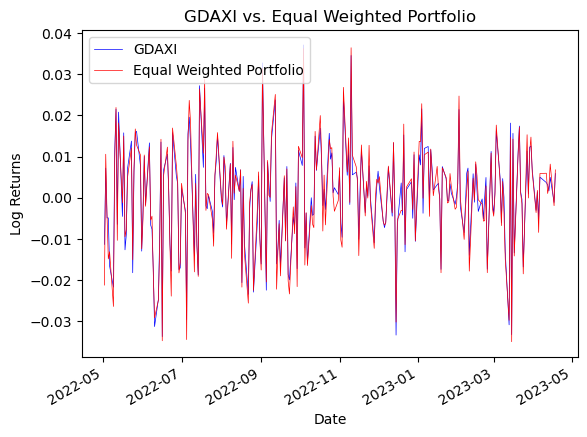

In [66]:
gedaxi_log_ret['.GDAXI'].plot(linewidth=0.5, color='blue', label='GDAXI')
eq_wei_portfolio_log['Equal Weighted Portfolio'].plot(linewidth=0.5, color='red', label='Equal Weighted Portfolio')
plt.legend(loc='upper left')
plt.title('GDAXI vs. Equal Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

### Task: 

We now want to compare the risk of **both** portfolios from the previous task ('.GDAXI and the equally weighted portfolio'). To do so, calculate the 95% 1-day [Value at Risk (VaR)](https://en.wikipedia.org/wiki/Value_at_risk), using:

* Historical simulation,
* the Parametric method,
* Monte Carlo simulation.

Add all values to a data frame and `display()`

In [75]:
# Loading returns data
returns = prices.pct_change()

# removing nan values
returns = returns.iloc[1:,:]

# Extrating the values for gedaxi
gedaxi_ret = pd.DataFrame(returns['.GDAXI'])

# Calculating the mean per column for the equal weighted portfolio
eq_wei_portfolio_ret = pd.DataFrame(returns.iloc[:,1:].mean(axis=1), index=logreturns.index)
eq_wei_portfolio_ret.columns = ['Equal Weighted Portfolio']

# removing nan values
eq_wei_portfolio_ret = eq_wei_portfolio_ret.iloc[1:,:]

In [77]:
# Historical VaR
# setting the confidence level
confidence_level = 0.95

# Calculating the VaR for the GDAXI and the equal weighted portfolio
hist_sim_GDAXI = np.percentile(gedaxi_ret['.GDAXI'].dropna(), 100 * (1 - confidence_level))
hist_sim_eq_wei_port = np.percentile(eq_wei_portfolio_ret['Equal Weighted Portfolio'].dropna(), 100 * (1 - confidence_level))

# Creating result DataFrame
compar_df = pd.DataFrame({'Historical Simulation': [hist_sim_GDAXI, hist_sim_eq_wei_port]}, index=['.GDAXI', 'Equal Weighted Portfolio'])
compar_df

,Historical Simulation
.GDAXI,-0.019268
Equal Weighted Portfolio,-0.021563


In [96]:
from scipy import stats
# Parametric VaR
alpha = stats.norm.ppf(confidence_level)

# Calculating the mean and the covariance matrix for GDAXI
mean_returns_GDAXI = returns['.GDAXI'].mean()
std_returns_GDAXI = returns['.GDAXI'].std()

# Calculating the parametric VaR for GDAXI
VaR_1day_95_param_GDAXI = -mean_returns_GDAXI - alpha * std_returns_GDAXI



# Calculating the mean and the covariance matrix for the equal weighted portfolio
mean_returns_port = eq_wei_portfolio_ret['Equal Weighted Portfolio'].mean()
std_returns_port = eq_wei_portfolio_ret['Equal Weighted Portfolio'].std()

# Calculating the parametric VaR for the equal weighted portfolio
VaR_1day_95_param_port = -mean_returns_port - alpha * std_returns_port



# Adding to the result DataFrame
compar_df['Parametric'] = [VaR_1day_95_param_GDAXI, VaR_1day_95_param_port]  
compar_df

,Historical Simulation,Parametric
.GDAXI,-0.019268,-0.020433
Equal Weighted Portfolio,-0.021563,-0.021616


In [110]:
# Monte Carlo VaR
np.random.seed(888) # setting a seed for reproducibility
n_sim = 10000

# Simulate daily returns for GDAXI
sim_returns_GDAXI = np.random.normal(mean_returns_GDAXI, std_returns_GDAXI, n_sim)
# Note how this is similar to historical simulation
VaR_1day_95_sim_GDAXI = np.percentile(sim_returns_GDAXI, 100 * (1 - confidence_level))


# Simulate daily returns for the equal weighted portfolio
sim_returns_port = np.random.normal(mean_returns_port, std_returns_port, n_sim)
# Note how this is similar to historical simulation
VaR_1day_95_sim_port = np.percentile(sim_returns_port, 100 * (1 - confidence_level))


# Adding to the result DataFrame
compar_df['Monte Carlo'] = [VaR_1day_95_sim_GDAXI, VaR_1day_95_sim_port]  
compar_df

,Historical Simulation,Parametric,Monte Carlo
.GDAXI,-0.019268,-0.020433,-0.019054
Equal Weighted Portfolio,-0.021563,-0.021616,-0.020645


In [ ]:
# TODO Obigen Plot mit Subplot erstellen? + letze Aufgabe

### Task: 

In order to visualize the VaR results we focus only on '.GDAXI' (you can create `plt.subplots()` for the equally weighted portfolio if you like). In the plot:

1. Plot a histogram of the returns
2. Add a line plot of the normal distribution (parameterized to the returns)
3. Add indicators for the 3 VaRs (vertical lines or annotations)